### Softmax function

- Version 1 : $a_i = exp(z_i) \div \sum_{i=1}^{C}{exp(z_i)}$
- Version 2 : $a_i = exp(z_i - c) \div \sum_{i=1}^{C}{exp(z_i - c)}$

In [2]:
import numpy as np

def old_softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of scores.
    Z: a numpy array of shape (N, C)
    return a numpy array of shape (N, C)
    """
    e_Z = np.exp(Z)
    return e_Z/e_Z.sum(axis=1, keepdims=True)

In [3]:
import numpy as np

def softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of scores.
    Z: a numpy array of shape (N, C)
    return a numpy array of shape (N, C)
    """
    e_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return e_Z/e_Z.sum(axis=1, keepdims=True)

### Cross entropy

- $H(p, q) = - \sum_{i=1}^{C}{p_i log(q_i)}$

In [4]:
import matplotlib.pyplot as plt

p = 0.1 # 0.9 0.5 ...
f = lambda q: -(p*np.log(q) + (1-p)*np.log(1-q))

dom = np.linspace(0 + 1e-6, 1 - 1e-6, 10000)
val = [f(q) for q in dom]
plt.plot(dom, val, c="red")
val = [(p - q)**2 for q in dom]
plt.plot(dom, val, c="blue")
plt.show()

<Figure size 640x480 with 1 Axes>

### Softmax regression

$\mathcal{L}(\mathbf{W; X, Y}) = - \sum_{i=1}^{C}{log(a_{y_i,i})} \div N$

### Regularization

$\mathcal{L}(\mathbf{W; X, Y}) = - \sum_{i=1}^{C}{log(a_{y_i,i})} \div N + \lambda ||W||_2^2 \div 2$

In [5]:
def softmax_loss(X, y, W):
    A = softmax(X.dot(W))
    return -np.mean(np.log(A[:,y]))

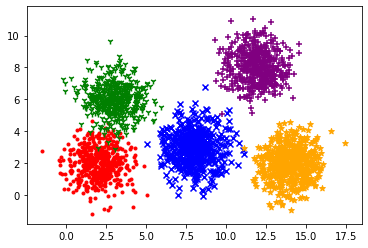

In [6]:
C, N = 5, 500
# number of classes and number of points per class
means = [[2, 2], [8, 3], [3, 6], [14, 2], [12, 8]]
cov = [[1, 0], [0, 1]]
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)
X4 = np.random.multivariate_normal(means[4], cov, N)
_X = np.concatenate((X0, X1, X2, X3, X4), axis = 0)
y = np.asarray([0]*N + [1]*N + [2]*N+ [3]*N + [4]*N)

plt.scatter(_X[0*N:1*N,0], _X[0*N:1*N,1], c="red", marker='.')
plt.scatter(_X[1*N:2*N,0], _X[1*N:2*N,1], c="blue", marker='x')
plt.scatter(_X[2*N:3*N,0], _X[2*N:3*N,1], c="green", marker='1')
plt.scatter(_X[3*N:4*N,0], _X[3*N:4*N,1], c="orange", marker='*')
plt.scatter(_X[4*N:5*N,0], _X[4*N:5*N,1], c="purple", marker='+')
plt.show()